In [38]:
import numpy as np 
import matplotlib.pylab as plt 
from matplotlib import cm
import emcee 
import scipy.stats as ss 

from getdist import plots, MCSamples
import getdist

fontSize = 20

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.1, 'smooth_scale_1D':0.1}
np.set_printoptions(precision=3)

### Equation

$$
y|\theta \sim N(\theta_{1}+\theta_{2}^{2},\sigma_{y}^{2})
$$

$$
\theta \sim N(0, \sigma_{\theta}^{2})
$$

- $\theta_{1}+\theta_{2}^{2}=1$
- $\sigma_{y}=2$
- $\sigma_{\theta}=1$

In [76]:
theta1 = 0.5
theta2 = np.sqrt(1-0.5)
sigma_y = 2.0
sigma_theta = 1.0
ndata = 100

In [77]:
def model(theta):
    return theta[0] + theta[1]**2

In [78]:
def logprior(theta):
    ntheta = len(theta)
    identity = np.identity(ntheta)
    dist = ss.multivariate_normal(np.zeros(ntheta), identity)
    return dist.logpdf(theta)

In [79]:
def loglike(theta, data, sigma):
    theory = model(theta)
    diff = data - theory 
    chi2 = np.sum((diff/sigma)**2)
    return -0.5*chi2

In [80]:
def logpost(theta, data, sigma):
    log_l = loglike(theta, data, sigma)
    log_p = logprior(theta)
    return log_l + log_p

In [81]:
data = model([theta1, theta2]) + np.random.normal(0, sigma_y, ndata)

In [82]:
pos = np.array([theta1, theta2]) + 0.1 * np.random.randn(32, 2)

nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, logpost, args=(data, sigma_y))

sampler.run_mcmc(pos, 10000, progress=True);

100%|██████████| 10000/10000 [01:07<00:00, 147.46it/s]


In [83]:
names = ["x%s"%i for i in range(ndim)]
labels =  [r"$\theta_%s$"%i for i in range(ndim)]
samples = MCSamples(samples=sampler.flatchain, names = names, labels = labels, settings = settings)

Removed no burn in


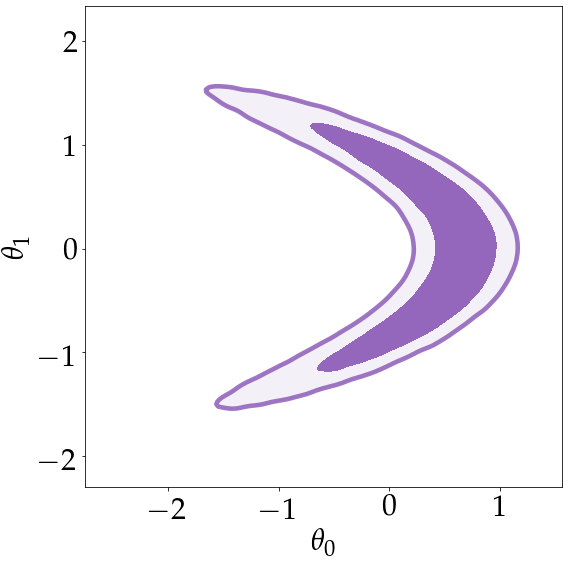

In [84]:
cont_color = cm.tab10.colors[4]
g = plots.get_single_plotter(width_inch=8, ratio=1)
g.settings.axes_fontsize = 30
g.settings.lab_fontsize = 30
g.settings.fontsize = 35
g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6
g.settings.alpha_factor_contour_lines = 0.9
g.settings.lw_contour = 2
g.plot_2d([samples], 'x0', 'x1', filled=True, colors=[cont_color])
plt.show()

In [73]:
np.mean(sampler.flatchain, axis = 0)

array([0.373, 0.025])

In [75]:
np.median(sampler.flatchain, axis = 0)

array([0.534, 0.036])

In [74]:
[theta1, theta2]

[0.5, 0.7071067811865476]